In [23]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, plot_tree, plot_importance

In [13]:
X, y = load_breast_cancer(return_X_y=True)
X[X == '?'] = 0
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)

print (accuracy_score(y_test, model.predict(X_test)))

0.9649122807017544


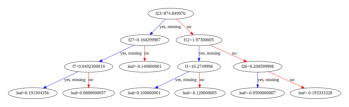

In [19]:
plot_tree(model)
plt.show()

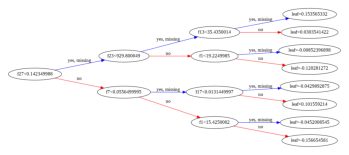

In [22]:
plot_tree(model, num_trees=3, rankdir='LR')
plt.show()

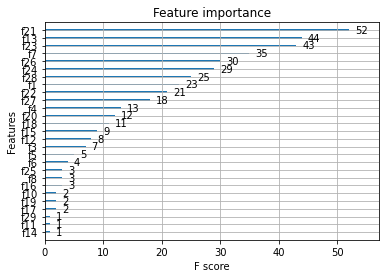

In [24]:
plot_importance(model)
plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort


thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_x_train = selection.transform(X_train)

  selection_model = XGBClassifier()
  selection_model.fit(select_x_train, y_train)

  select_x_test = selection.transform(X_test)
  print (accuracy_score(y_test, model.predict(select_x_test)))


0.9649122807017544
0.9649122807017544
0.9649122807017544


ValueError: ignored

*Early Stopping*

In [32]:
model = XGBClassifier(n_thread=-1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["error", 'logloss'], eval_set=eval_set, verbose=True)
model.evals_result()

[0]	validation_0-error:0.030151	validation_0-logloss:0.611048	validation_1-error:0.05848	validation_1-logloss:0.615463
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.027638	validation_0-logloss:0.542632	validation_1-error:0.05848	validation_1-logloss:0.54949
[2]	validation_0-error:0.027638	validation_0-logloss:0.486204	validation_1-error:0.05848	validation_1-logloss:0.498039
[3]	validation_0-error:0.030151	validation_0-logloss:0.436722	validation_1-error:0.05848	validation_1-logloss:0.453071
[4]	validation_0-error:0.027638	validation_0-logloss:0.395708	validation_1-error:0.05848	validation_1-logloss:0.414408
[5]	validation_0-error:0.017588	validation_0-logloss:0.358646	validation_1-error:0.05848	validation_1-logloss:0.383646
[6]	validation_0-error:0.017588	validation_0-logloss:0.326798	validation_1-error:0.05848	validation_1-logloss:0.355158
[7]

{'validation_0': {'error': [0.030151,
   0.027638,
   0.027638,
   0.030151,
   0.027638,
   0.017588,
   0.017588,
   0.020101,
   0.020101,
   0.020101,
   0.020101,
   0.017588,
   0.015075,
   0.015075,
   0.015075,
   0.01005,
   0.01005,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.007538,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.005025,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
   0.002513,
  